In [1]:
## simple linear regresssion##

# step-1: BUSINESS PROBLEM UNDERSTANDING 


**Indentify relationship between total advertising spend and sales?

**Our next ad campaign will have a total spend of$ 200,000, how many units do we expect to sell as a result of this?  




# step-2: DATA UNDERSTANDING


**Data

This sample data displays sales for a particular product as a function of adverstisting budgets( in dollars) for TV, radio, and newspaper media. 


**Indepenent variables

 TV: Advertising dollars spent on TV for a TV for a single product in a given market (in dollars) CE

Radio: Advertising dollars spent on Radio

Newspaper: Advertising dollars spent on Newspaper

**Target Variable

Sales: sales of a single product in a given market SC RAMA KRISHNA


**Collect & Load Data

**Dataset Understanding

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
df = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\advertising.csv")    ## importing data 
df


,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [4]:
df.head()                                                      

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# Step-3: DATA PREPROCESSING

In [6]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

. by combining all the features,we get the "total spend"

In [7]:
df["total_spend"]=df["TV"]+df["radio"]+df["newspaper"]
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [8]:
df.drop(columns=["TV","radio","newspaper"],inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


In [9]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


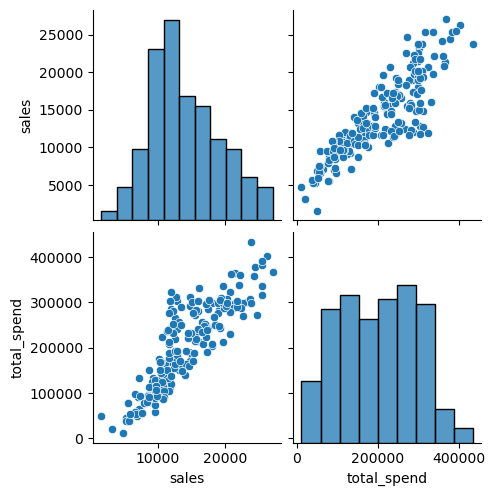

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


**DATA CLEANING

In [12]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

**DATA WANGLING

In [13]:
#NO ENCODING IS REQRUIRED (NO CATAGORICAL DATA )

**CREATE X & y

In [14]:
X=df[['total_spend']]
y=df['sales']

In [15]:
y

0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64

In [16]:
X

,total_spend
0,337100
1,128900
2,132400
3,251300
4,250000
...,...
195,55700
196,107200
197,192700
198,391800


**TRAIN-TEST SPLIT

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=True)

In [18]:
X_train

,total_spend
108,39100
107,113900
189,54200
14,283000
56,76800
...,...
133,298400
137,362300
72,79100
140,103300


In [19]:
y_train

108     5300
107     8700
189     6700
14     19000
56      5500
       ...  
133    19600
137    20800
72      8800
140    10900
37     14700
Name: sales, Length: 160, dtype: int64

# Step - 4 : MODELLING

                hat y = beta_{0} + beta_{1}*X 

In [20]:
df.shape

(200, 2)

In [21]:
#import
from sklearn.linear_model import LinearRegression

#save the model 
model = LinearRegression()

#fit 
model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("coefficients:",model.coef_)

Intercept: 4008.762867242771
coefficients: [0.05012858]


# Step-5 : EVALUATION

In [22]:
ypred_test = model.predict(X_test)

**MEAN ABSOLUTE ERROR(MAE)** is the mean of the absolute value of errors:

                    1/n sum|y- hat y |


   
   
   

In [23]:
from sklearn.metrics import mean_absolute_error
print("Test MAE:",mean_absolute_error(y_test,ypred_test))


Test MAE: 2169.9817661168977




**Mean Squared Error (MSE)** is the mean of the squared errors:

                    1/n sum(y- hat y )^ 2



In [24]:
from sklearn.metrics import mean_squared_error
print("Test MSE:",mean_squared_error(y_test,ypred_test))

Test MSE: 8548194.023007467


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

                  sqrt 1/n sum(y- hat y )^ 2

In [25]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,ypred_test)))


Test RMSE: 2923.7294715837625


In [26]:
print("Test R2:", model.score(X_test,y_test))


Test R2: 0.539781153461508


# MODEL SELECTION


**Checklist 1: Check whether model is good or either having overfitting/underfitting problem**

 **test accuracy = trainaccuracy**



In [27]:
# prediction on train data

ypred_train = model.predict(X_train)

#Train R2

print("Train R2:",model.score(X_train,y_train))



Train R2: 0.7842622790832501


**Checklist 2: whether the Test Accuracy =  Cross validation Score**

In [28]:
 from sklearn.model_selection import cross_val_score 
    
scores = cross_val_score(model,X,y,cv=5) 
print(scores)

print("Cross Validation Score:", scores.mean())



[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score: 0.7433783178555419


**Checklist 3: check whether, it satisfies the Business Problem Requirements**


**Checklist 4 (only for Linear Regression): Check for Assumptions**


**1. Linearity of Errors**


In [29]:
error = y_test - ypred_test


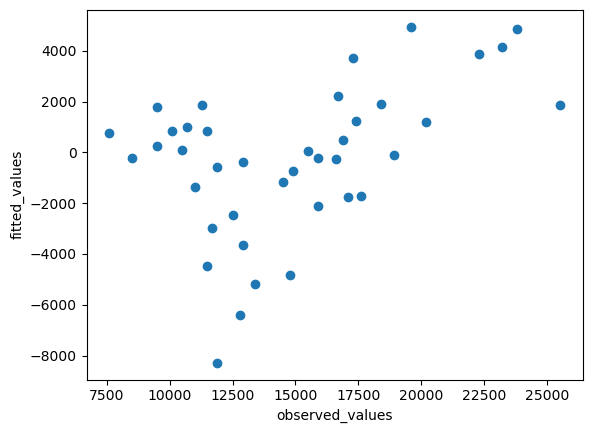

In [30]:
plt.scatter(y_test,error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

**2.Normality of errors**

In [31]:
error.skew()

-0.5800274421256926

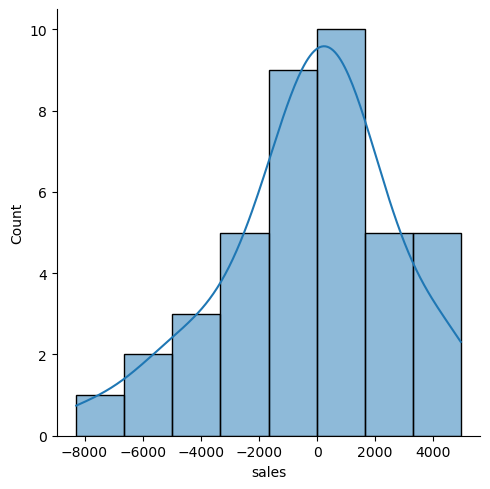

In [32]:
sns.displot(error,kde=True)
plt.show()


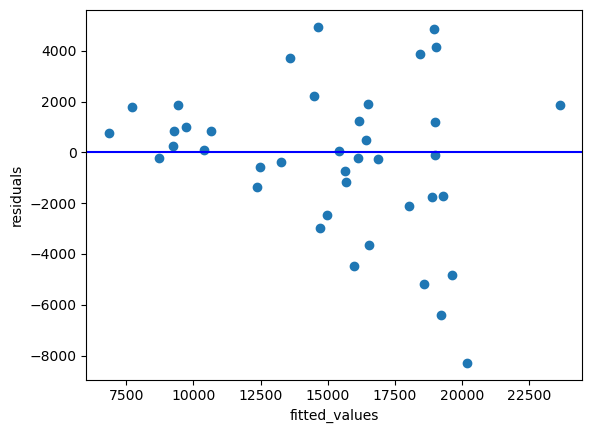

In [34]:
plt.scatter(ypred_test,error)
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

**4.VARIABLES SIGNIFICANCE**

In [44]:
import statsmodels.formula.api as smf
model2=smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.06e-62
Time:                        22:36:15   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# FINAL MODEL

In [48]:
#Modelling

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

#Prediction

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evvalution

print("Train R2:",model.score(X_train,y_train))
print ("Test R2:",model.score(X_test,y_test))
print("Cross Validation Score:", cross_val_score(model,X,y,cv=5).mean())



Intercept: 4008.762867242771
Coefficients: [0.05012858]
Train R2: 0.7842622790832501
Test R2: 0.539781153461508
Cross Validation Score: 0.7433783178555419


 **INTERPRETING THE COEFFICIENTS**

.1 unit increase in total Spend is associated with an increase of 0.0478 units in sales.

.This basically means that for every $10000 dollars spend on Ads, we could expect 478

more units sold.


**Use the model to make to ma how predictions on a new value. For a total spend of 200k on Ads,
how many units could we expect to be sold?**


In [49]:
new_data = pd.DataFrame({"total_spend":[200000]})
new_data

,total_spend
0,200000


In [51]:
model.predict(new_data)

array([14034.47883203])

# SAVE A MODEL

In [58]:
from joblib import dump

dump(model,"sales_model.joblib")

['sales_model.joblib']

# LOAD A MODEL & PREDICT

In [59]:
from joblib import load

loaded_model = load("sales_model.joblib")

loaded_model.predict(new_data)

array([14034.47883203])

actual values from  sirs df 

array ([13957.91946809])
interpect - 4389.814518436082
coef - [0.04784052]
train - 0.7426281082244577
test - 0.7868779454628924
error.skew() - 0.17729242735315792 

test mae - 1915.90776501548
test mse - 5868943.149727303
test rmse - 2422.590173704026
 test r2 - 0.7868779454628924